#Growth parameters

In [1]:
import pandas as pd

S = pd.read_csv('../data/150603_S_summary.csv', index_col = 0)
S = S.fillna(value = '')
S

,anneal,acetone,growth,T_growth,pos,T_eff,dummy
1,2-Jun,False,11-Jun,900,0,900,True
2,12-Jun,True,15-Jun,940,0,940,True
3,12-Jun,True,15-Jun,940,38,933,True
4,16-Jun,True,17-Jun,890,0,890,True
5,12-Jun,False,13-Jun,910,0,910,True
6,12-Jun,True,15-Jun,940,57,924,True
7,16-Jun,True,17-Jun,890,38,883,True
8,12-Jun,True,17-Jun,890,57,874,True
9,12-Jun,False,,,,,
10,16-Jun,True,17-Jun,910,0,910,True


### Legend
- anneal: date of anneal  
- acetone: true if chip dried out in acetone  
- growth: date of growth
- T_growth: furnace set temp
- pos: offset from center of furnace in mm (one chip is 17 mm)
- T_eff: effective temp taking the offset into account
- dummy: true if dummy chips were placed on both sides of the chip

# Density results

In [3]:
df = pd.read_csv('../data/150617_S_density.csv', delimiter = ';', index_col = None)

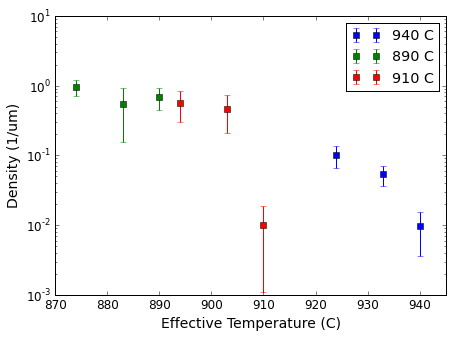

In [4]:
chips = [2, 3, 6, 4, 7, 8, 10, 11, 12]
color = ['b']*3 + ['g']*3 + ['r']*3

hs = []
for i, chip in enumerate(chips):
    results = df[df['chip'] == 'S%d' % chip]
    densities = [1/x for x in results.mean_spacing]
    
    avg = median(densities)
    err = std(densities)
    
    errorbar(S.loc[chip].T_eff, avg, yerr = err, fmt = 's'+color[i], 
             label = '%d C' % S.loc[chip].T_growth)

gca().set_yscale('log')
handles, labels = gca().get_legend_handles_labels()
legend(handles[0::3], labels[0::3])
xlabel('Effective Temperature (C)')
ylabel('Density (1/um)')
xlim(870, 945);